Works Cited:
https://www.fifauteam.com/fifa-19-attributes-guide/
https://www.fifauteam.com/fifa-ultimate-team-positions-and-tactics/


### Imports
----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

/Users/safa/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Pre Processing
------

In [2]:
features = ['Skill Moves','Age','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Offense', 'Defense']


# features = ['Finishing', 'LongShots', 'Penalties', 'Positioning', 'ShotPower','Volleys', 
#             'HeadingAccuracy', 'Interceptions', 'Marking', 'SlidingTackle', 'StandingTackle']

In [3]:
def evaluate(label):
    if label == 'High':
        return 3
    elif label == 'Medium':
        return 2
    elif label == 'Low':
        return 1
    
classes = {
 "ST":"O", "CF":"O", "RF":"O", "LF":"O", "RW":"O","LW":"O","RS":"O","LS":"O",
 "CAM":"M","RM":"M", "CM":"M", "LM":"M","CDM":"M","RCM":"M","LCM":"M","LDM":"M","LAM":"M","RDM":"M",
 "RWB":"D","RB":"D", "CB":"D", "LB":"D","LWB":"D","RCB":"D","LCB":"D",
 "GK":"GK"
}

In [4]:
df = pd.read_csv("data/data.csv")
df.drop(df[df['Work Rate'].isnull()].index, inplace=True)
df.drop(df[df['Position'].isnull()].index, inplace=True)
df['Offense'] = df["Work Rate"].map(lambda x: evaluate(x.split('/ ')[0]))
df['Defense'] = df["Work Rate"].map(lambda x: evaluate(x.split('/ ')[1]))
df.drop(df[df[features].isnull().any(axis=1)].index, inplace=True)
df['Role'] = df.Position.replace(classes)
X = df[features]
y = df['Role']

### Classification
-----

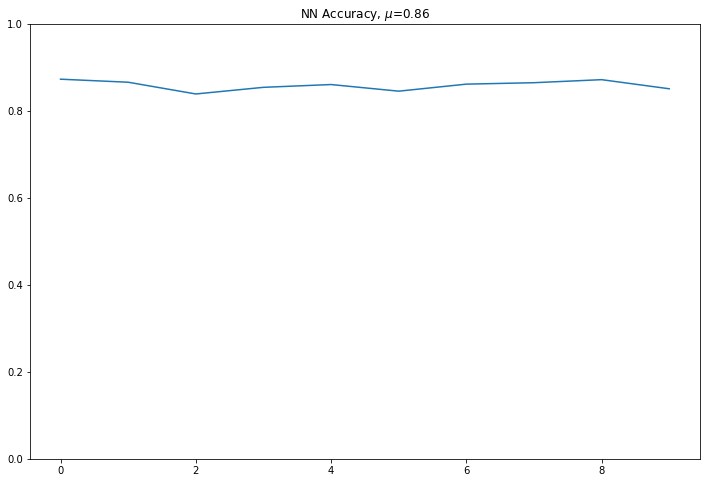

In [103]:
scores = []
plt.figure(figsize=(12,8))
for i in range(10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    le = LabelEncoder()
    le.fit(df.Role)
    nn = MLPClassifier(alpha=1)
    nn.fit(X_train, le.transform(y_train))
    y_pred = nn.predict(X_test)
    scores.append(sum(le.transform(y_test) == y_pred) / len(y_test))
plt.title(f"NN Accuracy, $\mu$={round(np.mean(scores),2)}")
plt.ylim([0,1])
plt.plot(scores)

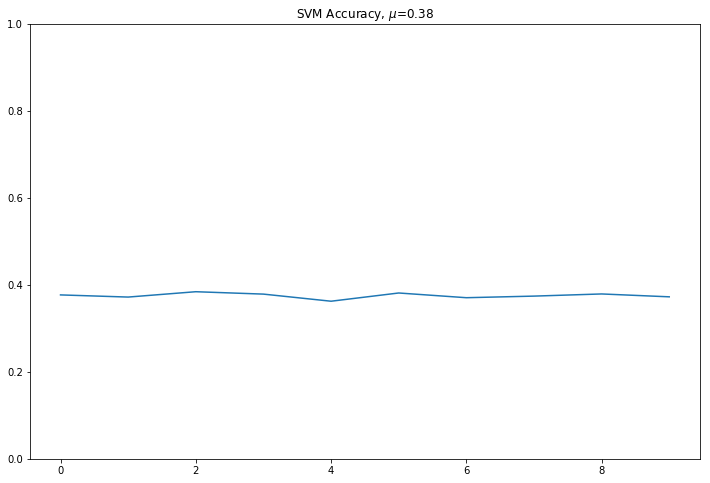

In [87]:
scores = []
plt.figure(figsize=(12,8))
for i in range(10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    le = LabelEncoder()
    le.fit(df.Role)
    svm = SVC(gamma=2, C=1)
    svm.fit(X_train, le.transform(y_train))
    y_pred = svm.predict(X_test)
    scores.append(sum(le.transform(y_test) == y_pred) / len(y_test))
plt.title(f"SVM Accuracy, $\mu$={round(np.mean(scores),2)}")
plt.ylim([0,1])
plt.plot(scores)

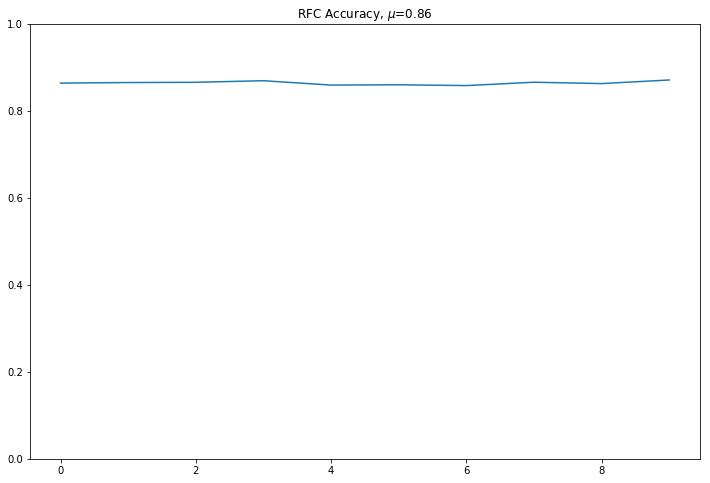

In [104]:
scores = []
plt.figure(figsize=(12,8))
for i in range(10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    le = LabelEncoder()
    le.fit(df.Role)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, le.transform(y_train))
    y_pred = rfc.predict(X_test)
    scores.append(sum(le.transform(y_test) == y_pred) / len(y_test))
plt.title(f"RFC Accuracy, $\mu$={round(np.mean(scores),2)}")
plt.ylim([0,1])
plt.plot(scores)

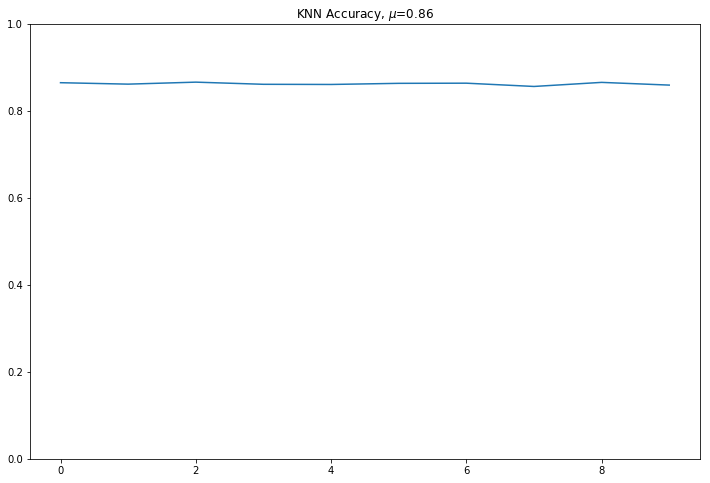

In [105]:
scores = []
plt.figure(figsize=(12,8))
for i in range(10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    le = LabelEncoder()
    le.fit(df.Role)
    knn = KNeighborsClassifier(len(set(df.Role)))
    knn.fit(X_train, le.transform(y_train))
    y_pred = knn.predict(X_test)
    scores.append(sum(le.transform(y_test) == y_pred) / len(y_test))
plt.title(f"KNN Accuracy, $\mu$={round(np.mean(scores),2)}")
plt.ylim([0,1])
plt.plot(scores)

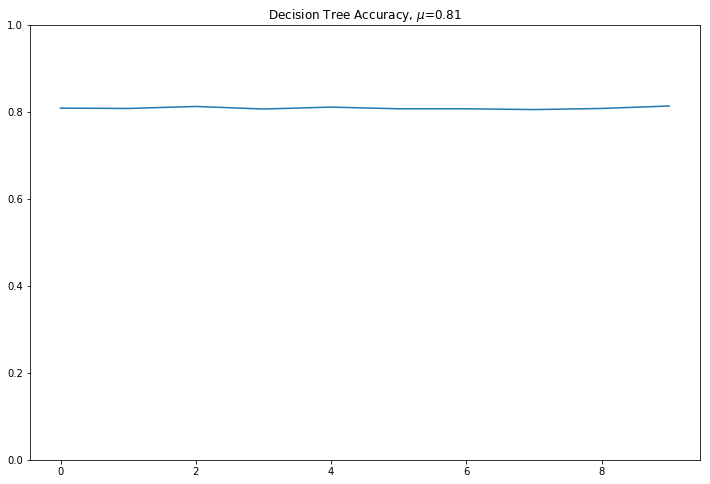

In [106]:
scores = []
plt.figure(figsize=(12,8))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    le = LabelEncoder()
    le.fit(df.Role)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, le.transform(y_train))
    y_pred = dtc.predict(X_test)
    scores.append(sum(le.transform(y_test) == y_pred) / len(y_test))
plt.title(f"Decision Tree Accuracy, $\mu$={round(np.mean(scores),2)}")
plt.ylim([0,1])
plt.plot(scores)

In [ ]:
y_pred = le.inverse_transform(y_pred)
for i in range(len(y_test)):
    if y_pred[i] == y_test.iloc[i]:
        print("Correct", y_pred[i])
    else:
        print("Predicted", y_pred[i], "Actual", y_test.iloc[i])

### Feature Importance
-----

In [12]:
import eli5
from eli5.sklearn import PermutationImportance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dtc = MLPClassifier(alpha=1).fit(X_train, y_train)
perm = PermutationImportance(dtc).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.1004 ± 0.0049,SlidingTackle
0.0583 ± 0.0078,BallControl
0.0536 ± 0.0074,Finishing
0.0491 ± 0.0049,Crossing
0.0464 ± 0.0045,Marking
0.0462 ± 0.0017,LongPassing
0.0281 ± 0.0054,Vision
0.0229 ± 0.0080,StandingTackle
0.0226 ± 0.0029,Positioning
0.0223 ± 0.0042,Interceptions


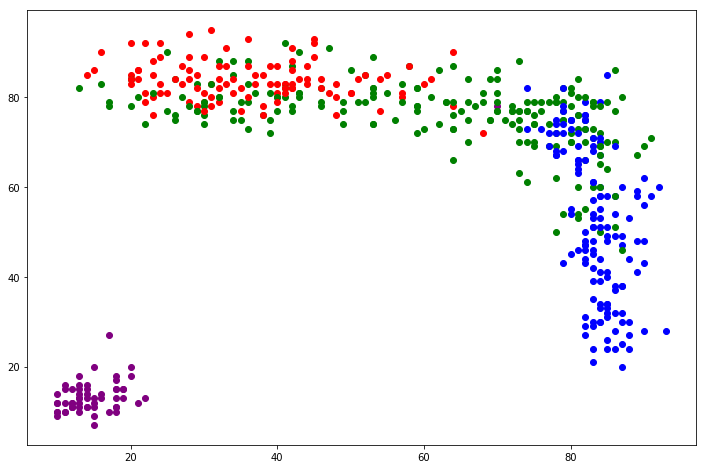

In [47]:
plt.figure(figsize=(12,8))
for i,row in df.iloc[:500].iterrows():
    if row.Role == 'O':
        color = 'red'
    elif row.Role == 'D':
        color = 'blue'
    elif row.Role == 'M':
        color = 'green'
    elif row.Role == 'GK':
        color = 'purple'
    plt.plot(row.StandingTackle,row.Positioning,c=color,marker='o')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

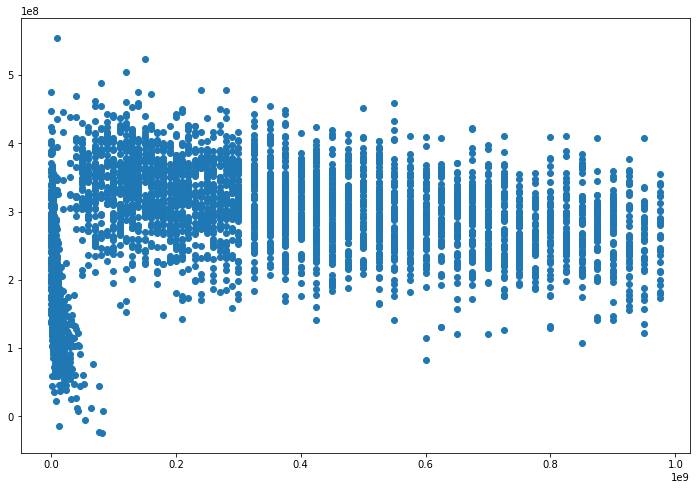

In [10]:
scores = []
plt.figure(figsize=(12,8))
X = df[features]
y = df.Value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(y_test, y_pred)

In [46]:
#list(zip(y_pred,y_test))
reg.score(X_train, y_train)

0.07770164444191952

In [8]:
def preproc_euros(df):
    check_cols = df.columns
    currency_cols = ['Value', 'Wage', 'Release Clause']
    df[check_cols] = df[check_cols].replace({'\€': ''}, regex=True)
    df[currency_cols] = df[currency_cols].apply(lambda x: x.str.strip('KM'))

    df[currency_cols] = df[currency_cols].apply(pd.to_numeric, errors='coerce')
    df['Value'] = df['Value'].mul(1000000, axis=0)
    df['Release Clause'] = df['Release Clause'].mul(1000000, axis=0)
    df['Wage'] = df['Wage'].mul(1000, axis=0)

    return df

df = preproc_euros(df)

In [8]:
df[(df.Role=='GK') & (df.SlidingTackle>40)].Name

5663    Z. Zlámal
Name: Name, dtype: object

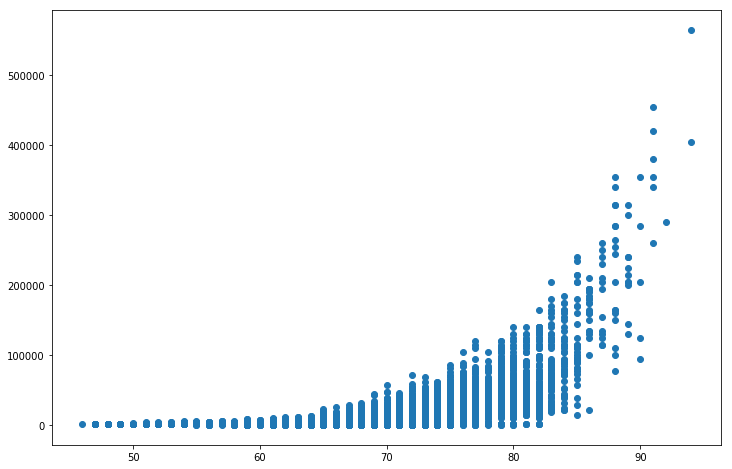

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(df.Overall, df.Wage)
#plt.ylim([df.Value.min(),df.Value.max()])

In [32]:
df[(df.Overall > 90) & df.Value < .2e9][['Value', 'Name','Overall']]

,Value,Name,Overall
0,110500000.0,L. Messi,94
1,77000000.0,Cristiano Ronaldo,94
2,118500000.0,Neymar Jr,92
3,72000000.0,De Gea,91
4,102000000.0,K. De Bruyne,91
5,93000000.0,E. Hazard,91
6,67000000.0,L. Modrić,91
7,80000000.0,L. Suárez,91
8,51000000.0,Sergio Ramos,91
9,68000000.0,J. Oblak,90


In [11]:
df[df.Role == 'D'].Aggression.median()

65.49948857824752

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
X_fit = pca.fit_transform(X)

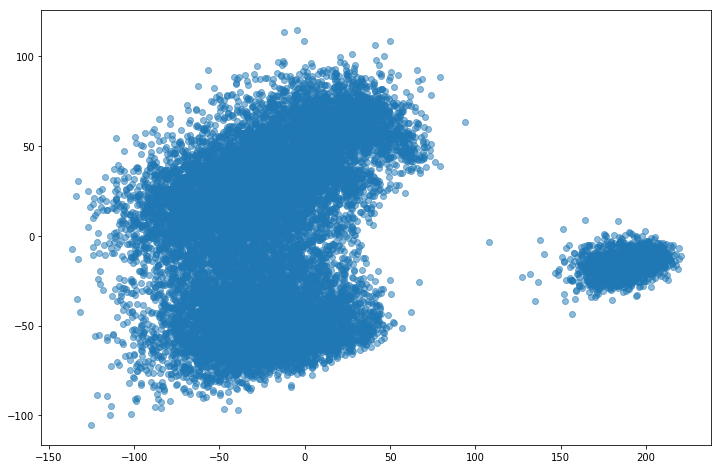

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_fit[:,0], X_fit[:,1], alpha=0.5)

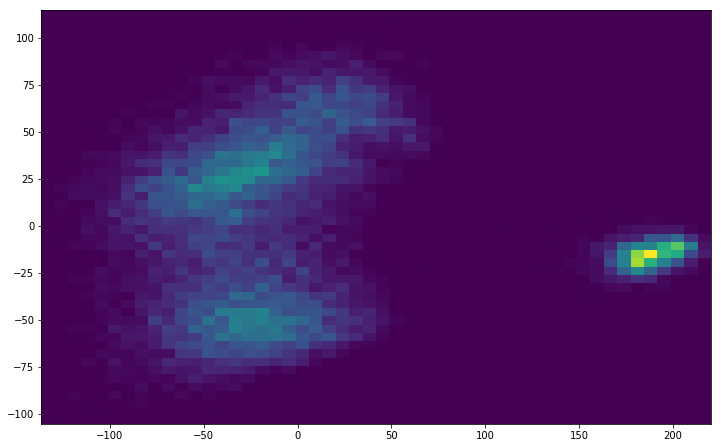

In [44]:
heatmap, xedges, yedges = np.histogram2d(X_fit[:,0], X_fit[:,1], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

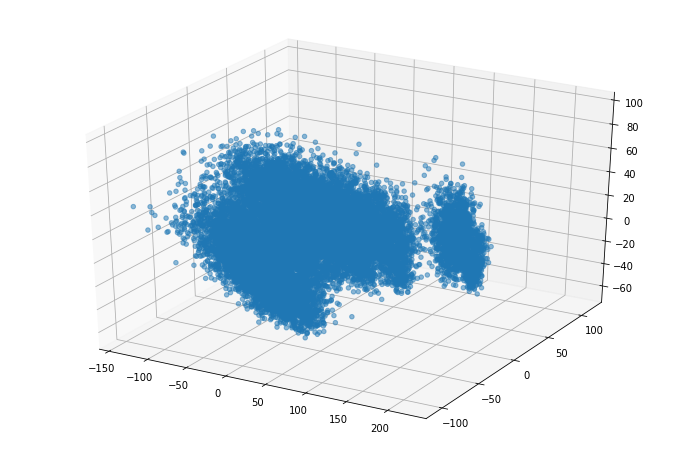

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_fit[:,0],X_fit[:,1],X_fit[:,2], alpha=0.5)

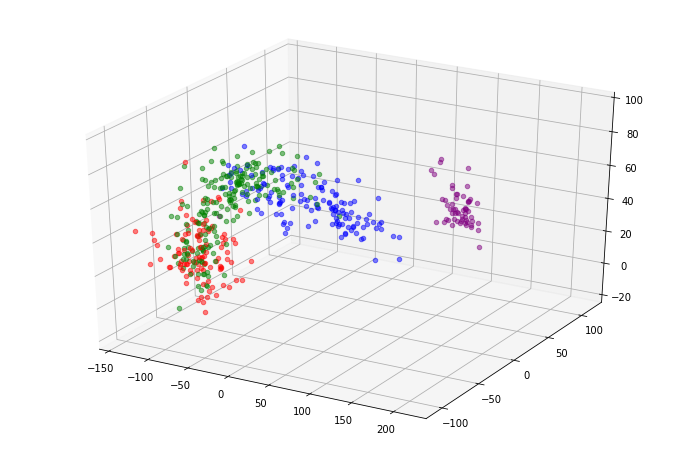

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
for i,row in df[:500].iterrows():
    if row.Role == 'O':
        color = 'red'
    elif row.Role == 'D':
        color = 'blue'
    elif row.Role == 'M':
        color = 'green'
    elif row.Role == 'GK':
        color = 'purple'
    ax.scatter(X_fit[i][0],X_fit[i][1],X_fit[i][2],c=color,marker='o', alpha=0.5)